In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=23)
X.shape

(1000, 2)

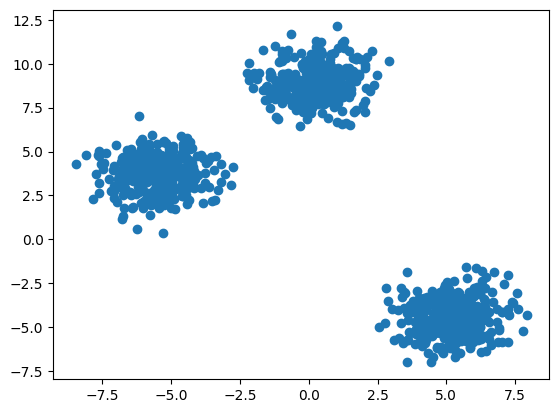

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
from sklearn.cluster import KMeans

In [5]:
#manual process 
# elbow method to select the k values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1183.8087518707132,
 1071.8332685255477,
 900.7650449653761,
 756.3838662795157,
 681.756987548988,
 581.4964855813602,
 545.6065347973429]

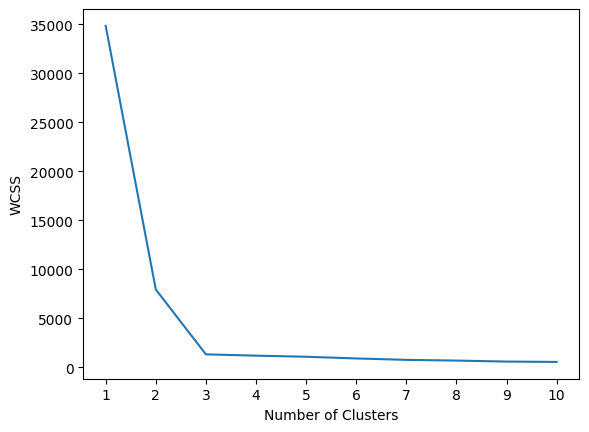

In [7]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")
y_labels=kmeans.fit_predict(X_train)

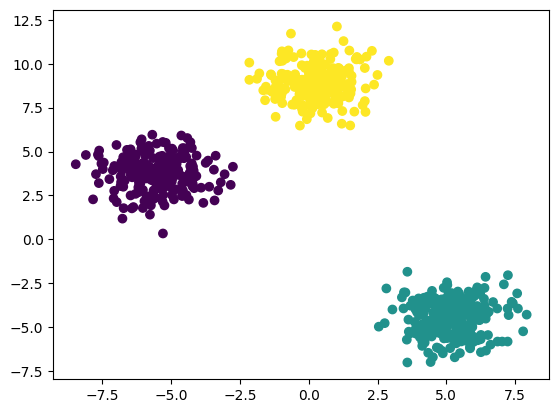

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [13]:
y_test_label=kmeans.predict(X_test)

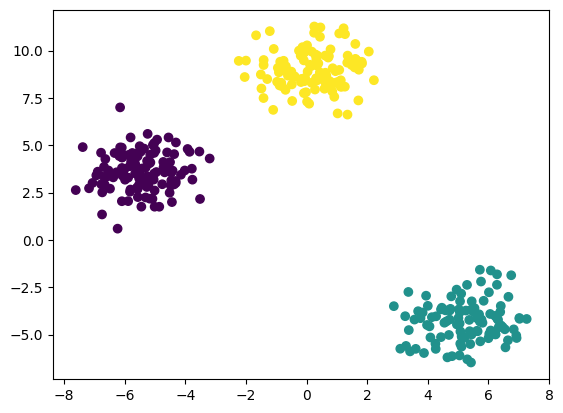

In [14]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [15]:
# to find k value for the large dataset we use knee library
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [18]:
#Performamce metrics
## Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [19]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.47302263229328617,
 0.3372432853806205,
 0.3487494498071299,
 0.32493247349448745,
 0.33163614317712203,
 0.3234643047924301]

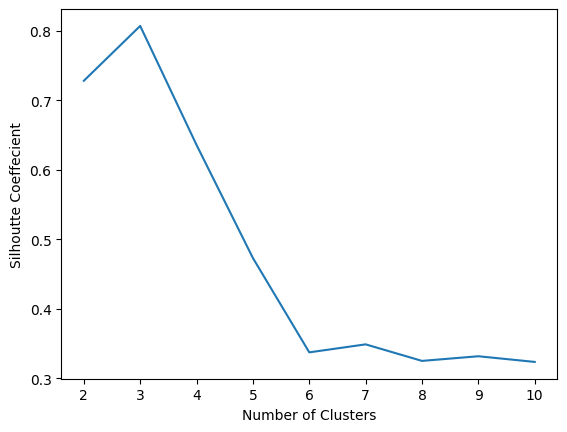

In [20]:
## ploting silhoutes score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [21]:
#Hirarchial Clustering Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#Imporrt iris dataset
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_scaled=scaler.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
X_scaled.shape

(150, 4)

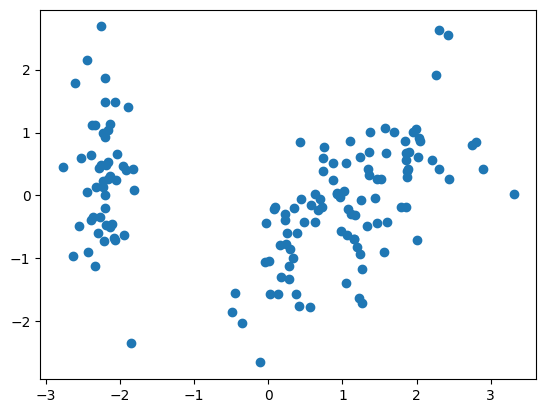

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [26]:
pca_scaled.shape

(150, 2)

Text(0, 0.5, 'Eucledian Distance')

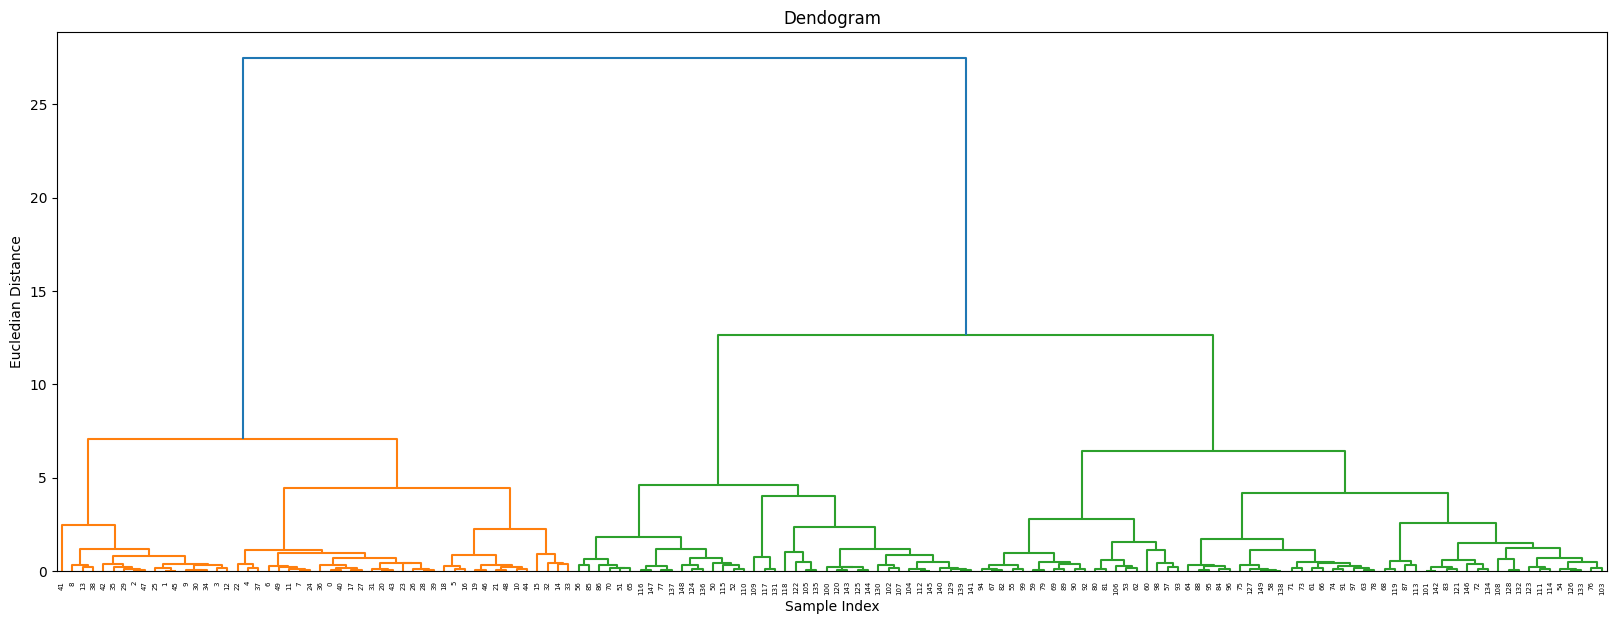

In [27]:
##Agglomerative Clustering
##To construct tge dendogram
import scipy.cluster.hierarchy as sc
##plot the denedogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

##create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [29]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)


AgglomerativeClustering()

In [30]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

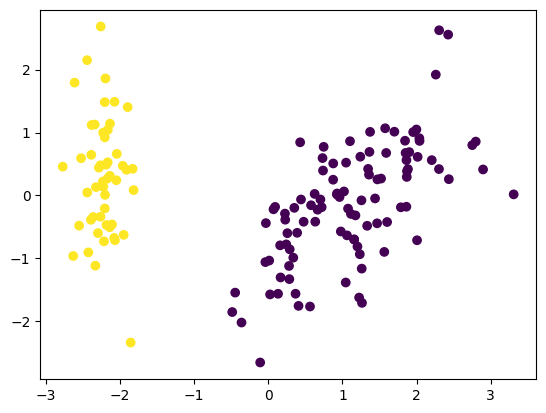

In [31]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [32]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,metric='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

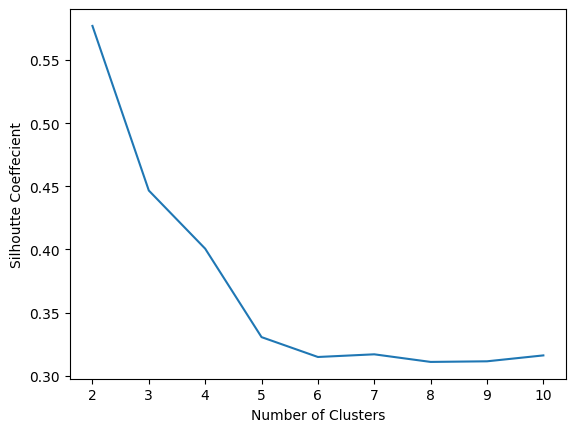

In [33]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [34]:
#DScan library
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
X,y=make_moons(n_samples=250,noise=0.05)
X

array([[-7.97536837e-01,  4.78537100e-01],
       [-5.54364014e-01,  8.19964825e-01],
       [-4.45656114e-02,  3.79524741e-01],
       [ 5.35473541e-01, -2.58527824e-01],
       [ 1.40817916e-01,  9.78668049e-03],
       [ 3.62521319e-01,  9.47870653e-01],
       [ 2.42407856e-02,  3.35237345e-02],
       [ 1.37428738e+00, -4.56735863e-01],
       [ 2.00260208e+00,  2.29158233e-01],
       [ 6.04234946e-01,  8.24915293e-01],
       [-1.00840127e+00,  2.05581909e-01],
       [ 4.65777465e-01, -3.39014423e-01],
       [-9.82573784e-01,  6.00775578e-01],
       [ 1.92591809e+00,  2.04272366e-01],
       [ 1.93193301e+00,  9.85129572e-02],
       [ 1.24944555e-01,  1.03682074e+00],
       [ 2.63607503e-01, -4.69317456e-02],
       [ 1.43226424e+00, -3.71562657e-01],
       [ 1.97272439e+00,  2.98453433e-01],
       [ 9.75834076e-01,  2.67822798e-01],
       [-7.45637744e-01,  6.63164116e-01],
       [-8.07215309e-01,  4.50816261e-01],
       [-1.01632718e-01,  5.13090797e-01],
       [ 9.

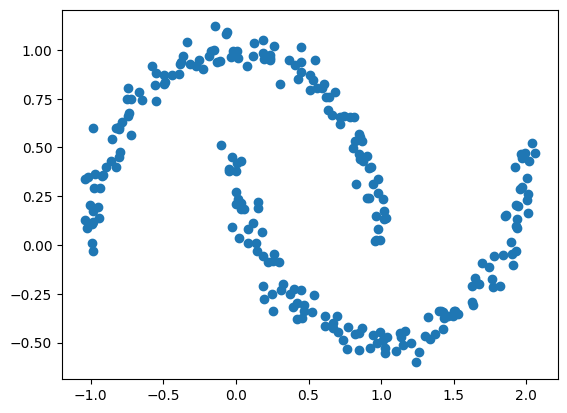

In [36]:
plt.scatter(X[:,0],X[:,1])

In [37]:
##feature scaling(Standard scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_scaled=scaler.fit_transform(X)

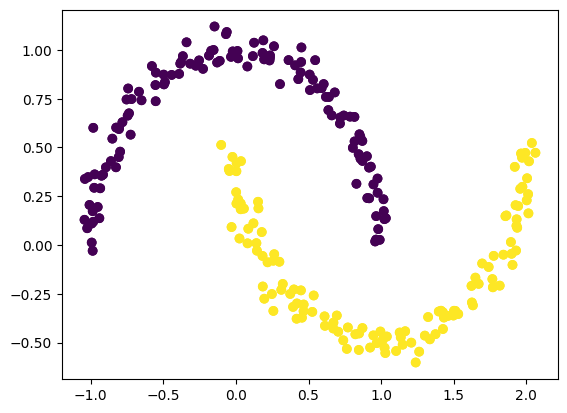

In [40]:
### DBSCAN Algorithms
from sklearn.cluster import DBSCAN
dbcan=DBSCAN(eps=0.5)
dbcan.fit(X_scaled)
dbcan.labels_
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)
plt.scatter(X[:,0],X[:,1],c=y)